In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [2]:
data = pd.read_excel("datasets/mpd2020.xlsx", sheet_name='Full data')
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


In [3]:
data.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

In [4]:
len(data.country.unique())

169

In [5]:
cntry_years = []
for cntry in data.country.unique():
    cy_data = data[data.country == cntry]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    cntry_years.append((cntry, ymin, ymax))
cntry_years = pd.DataFrame(cntry_years, columns=['country', 'Min Year', 'Max Year']).set_index('country')
cntry_years

,Min Year,Max Year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018
...,...,...
Yemen,1820,2018
Former Yugoslavia,1,2018
South Africa,1,2018


In [6]:
cntry_years.loc['Australia']

Min Year       1
Max Year    2018
Name: Australia, dtype: int64

In [7]:
code_to_name = data[['countrycode','country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

In [8]:
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


In [9]:
gdppc = data.set_index(['countrycode','year'])['gdppc']
gdppc = gdppc.unstack('countrycode')

In [10]:
gdppc

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000


In [11]:
code_to_name.loc['GBR']

country    United Kingdom
Name: GBR, dtype: object

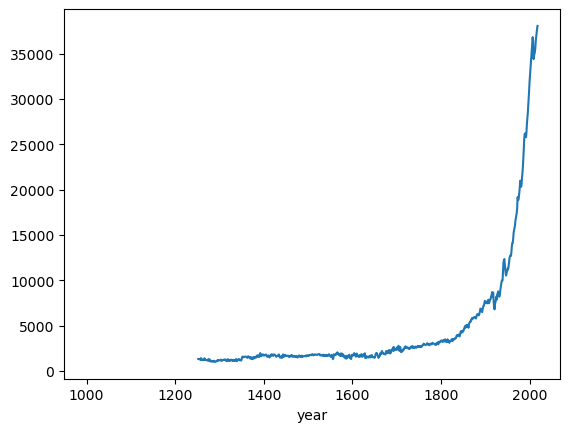

In [12]:
fig = plt.figure()
gdppc['GBR'].plot(ax = fig.gca())
plt.show()

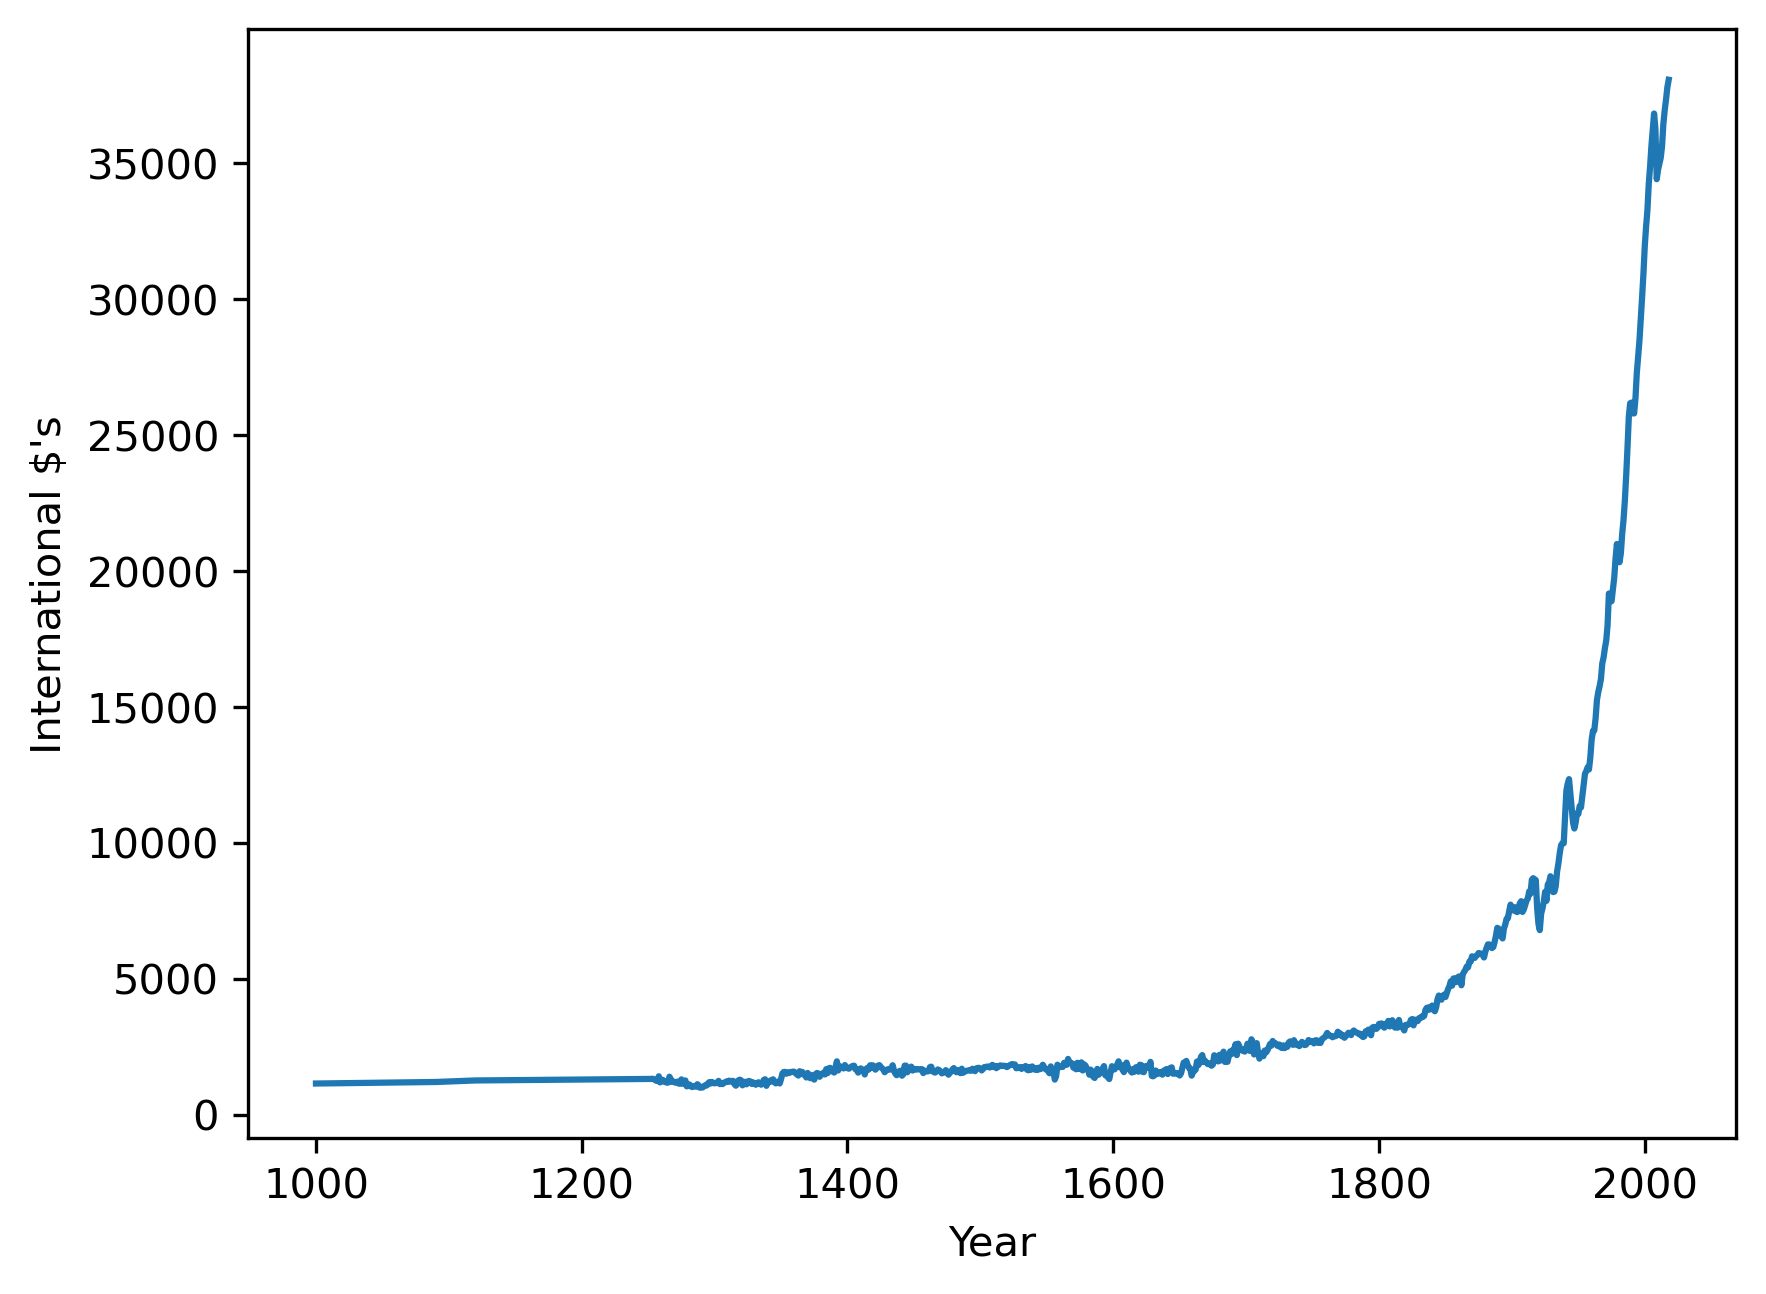

In [13]:
fig = plt.figure(dpi=300)
cntry = 'GBR'
gdppc[cntry].interpolate().plot(
    ax = fig.gca(),
    ylabel = 'International $\'s',
    xlabel = 'Year'
)
plt.show()

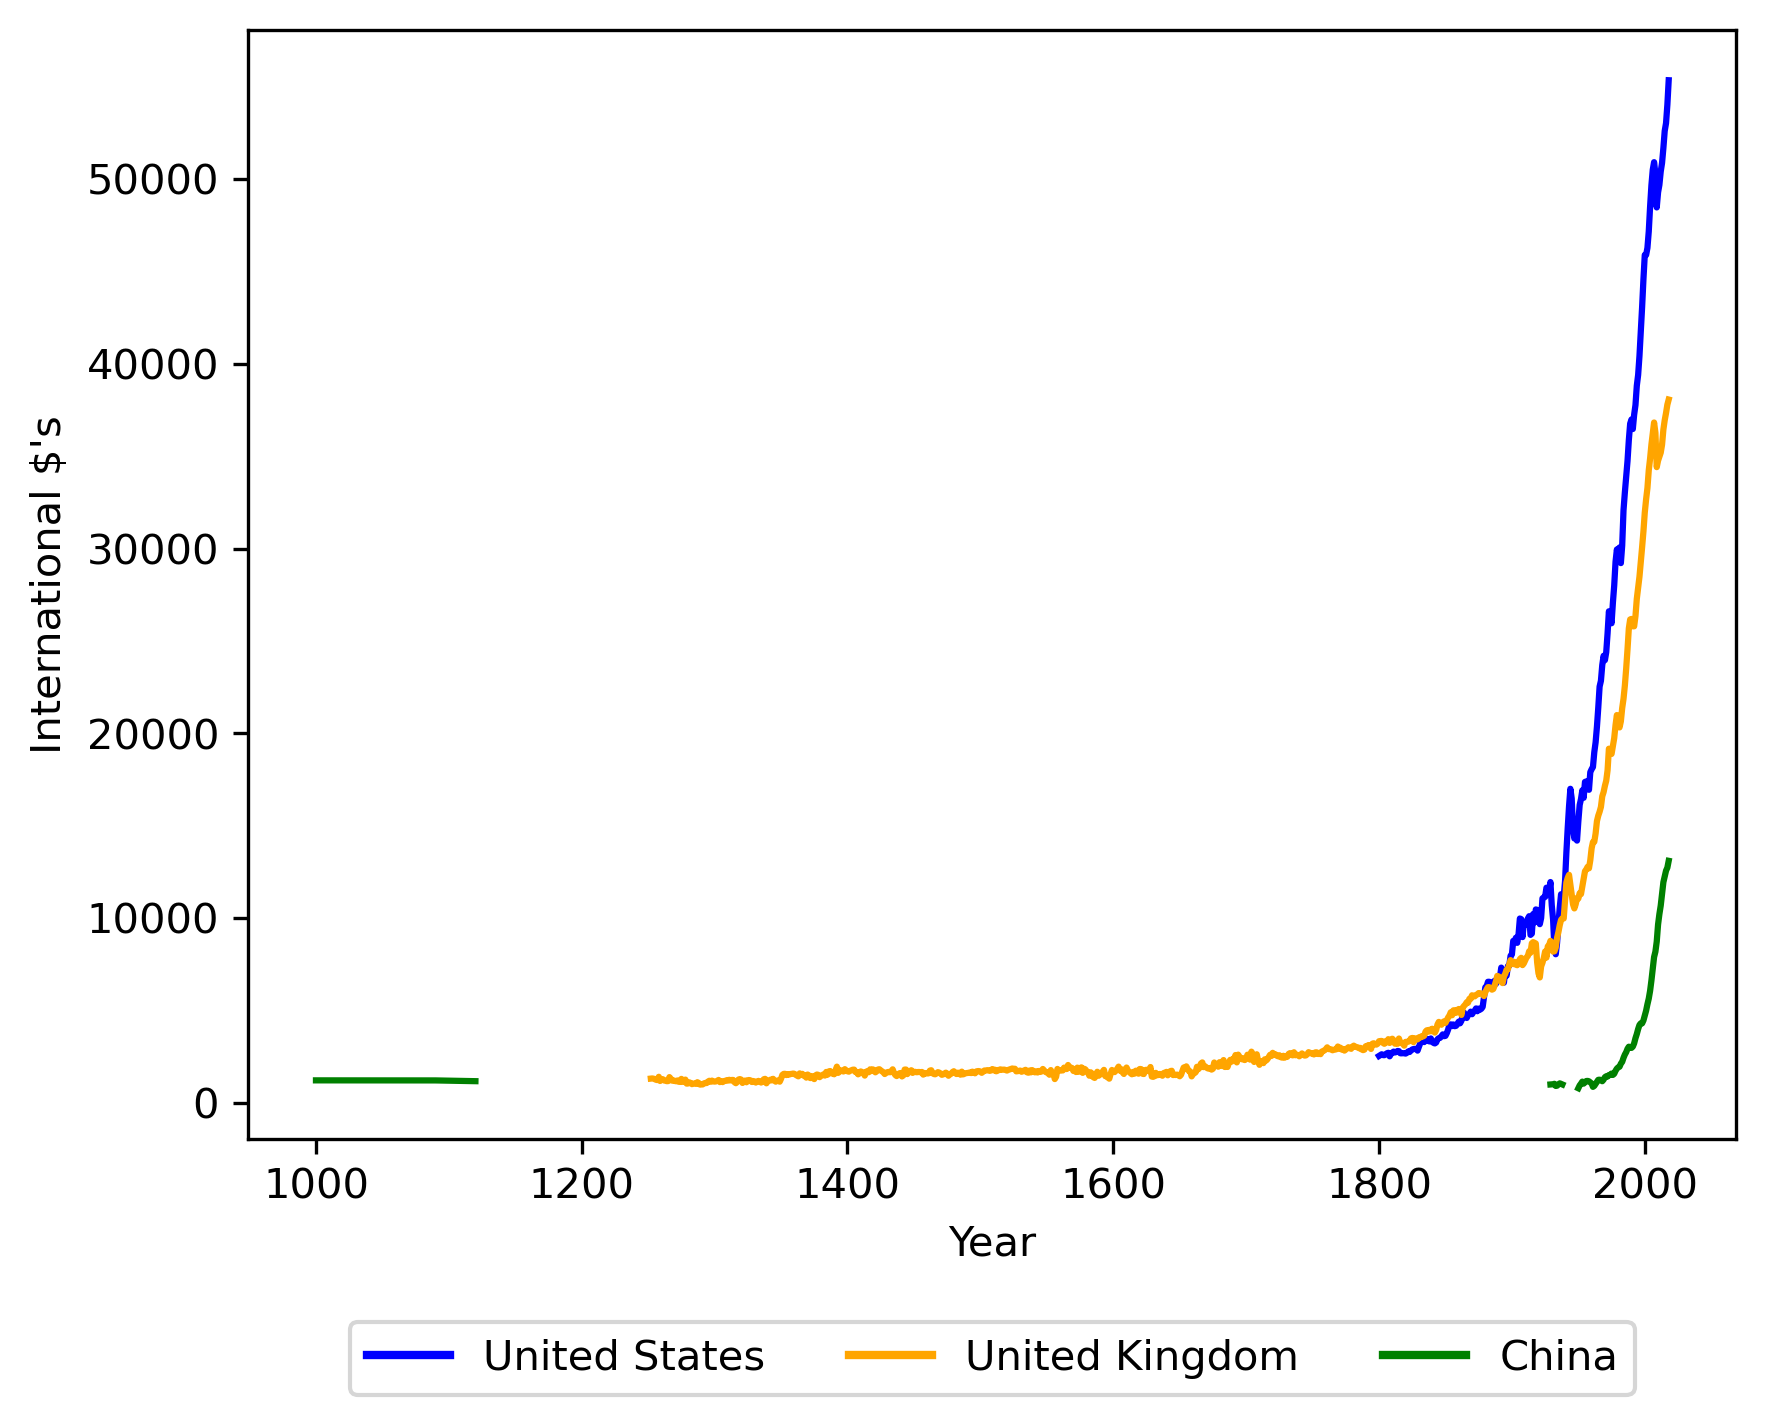

In [14]:
fig = plt.figure(dpi=300)
ax = fig.gca()
cntry = ['USA', 'GBR', 'CHN']
line_color = ['blue', 'orange', 'green']
gdppc[cntry].plot(
    ax = ax,
    ylabel = 'International $\'s',
    xlabel = 'Year',
    color = line_color
)

# Build Custom Legend
legend_elements = []
for i,c in enumerate(cntry):
    line = Line2D([0], [0], color=line_color[i], lw=2, label=code_to_name.loc[c]['country'])
    legend_elements.append(line)
ax.legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.25])
plt.show()

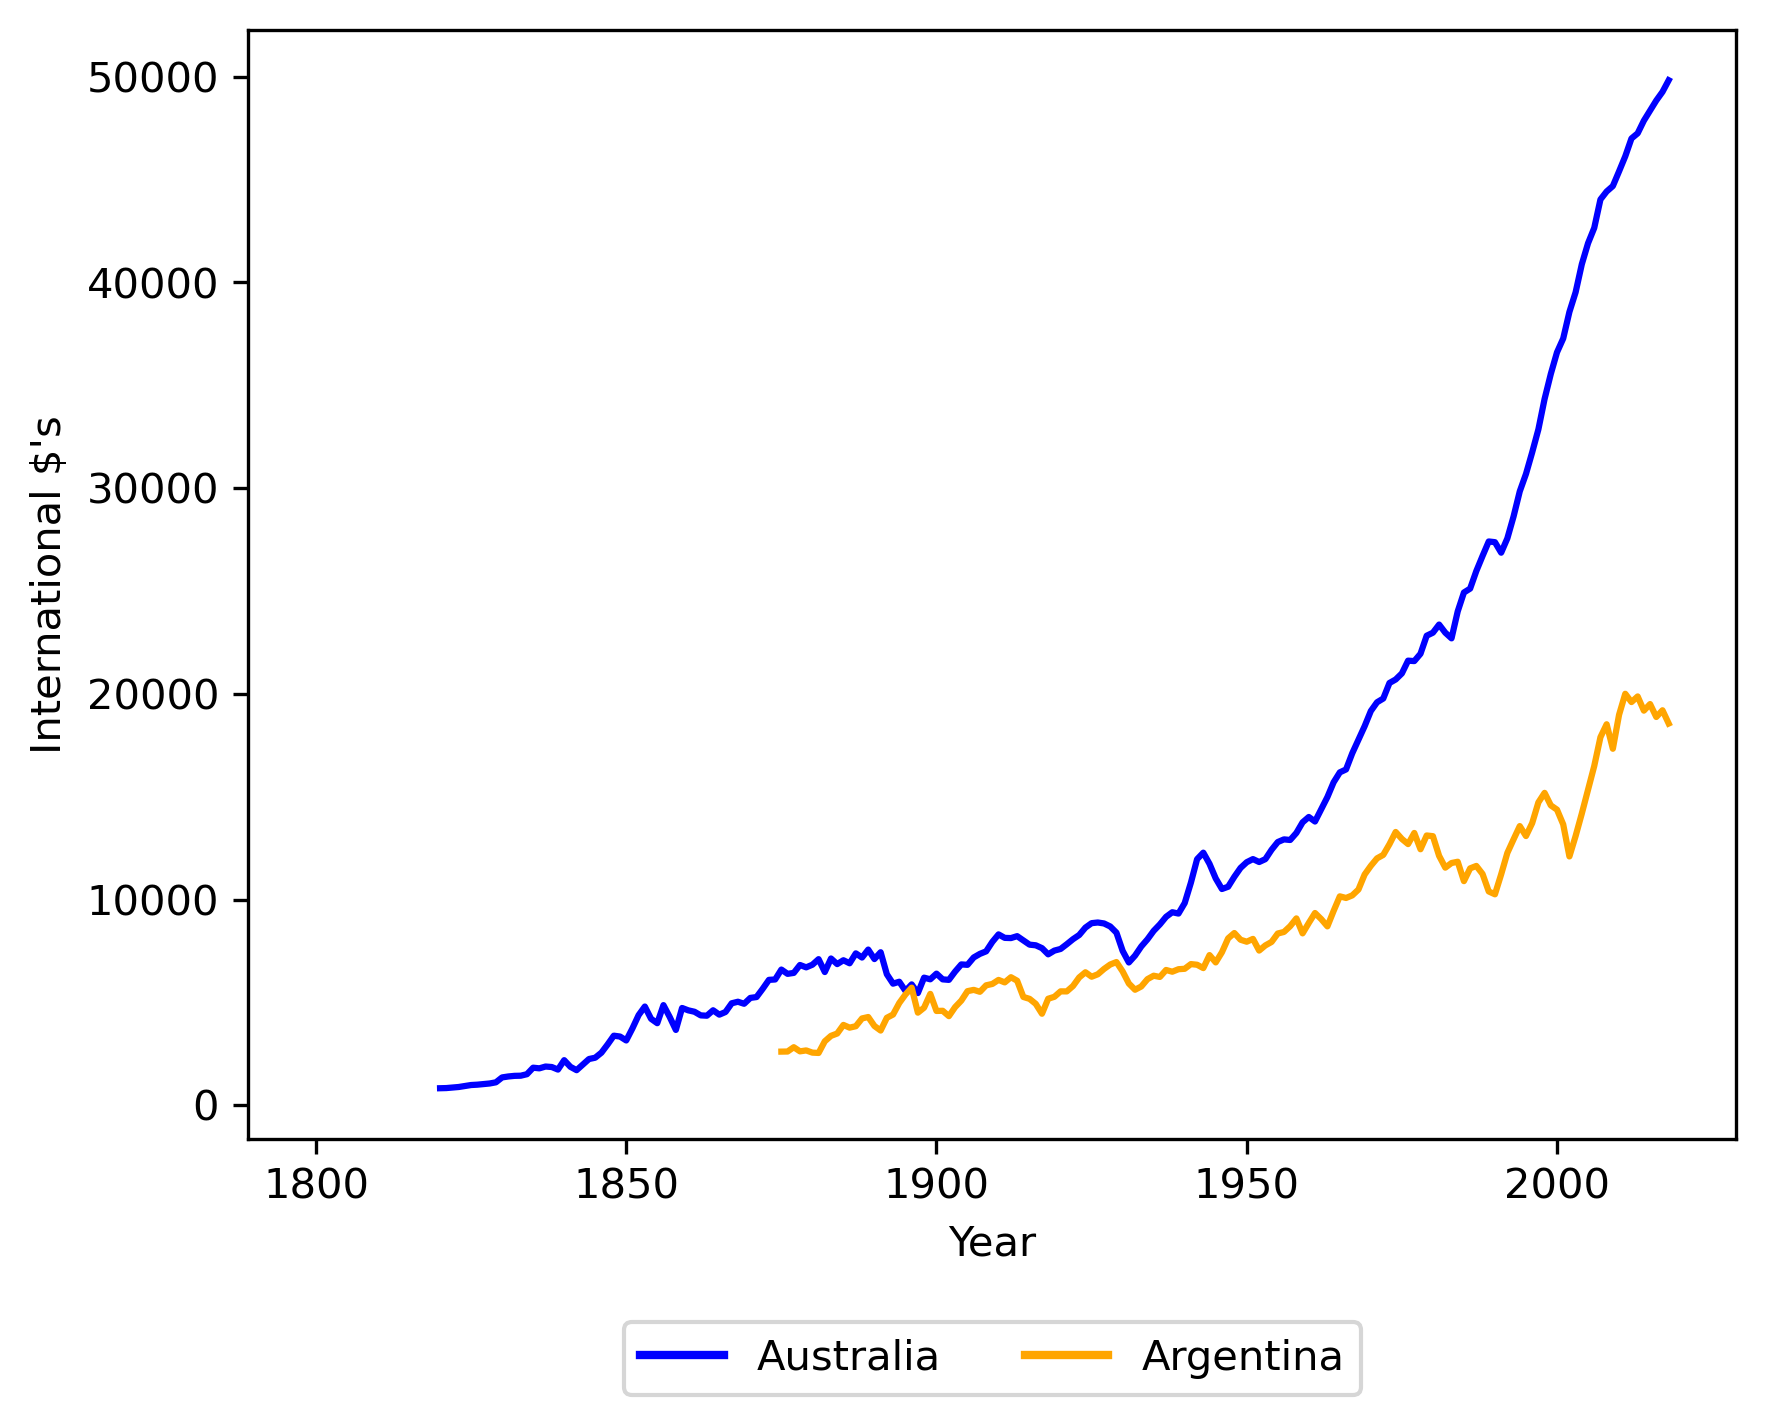

In [15]:
fig = plt.figure(dpi=300)
ax = fig.gca()
cntry = ['AUS', 'ARG']
line_color = ['blue', 'orange']
gdppc[cntry].plot(
    ax = ax,
    ylabel = 'International $\'s',
    xlabel = 'Year',
    color = line_color
)

# Build Custom Legend
legend_elements = []
for i,c in enumerate(cntry):
    line = Line2D([0], [0], color=line_color[i], lw=2, label=code_to_name.loc[c]['country'])
    legend_elements.append(line)
ax.legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.25])
plt.show()

In [16]:
data = pd.read_excel("datasets/mpd2020.xlsx", sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
gdp = data['gdp'].unstack('countrycode')

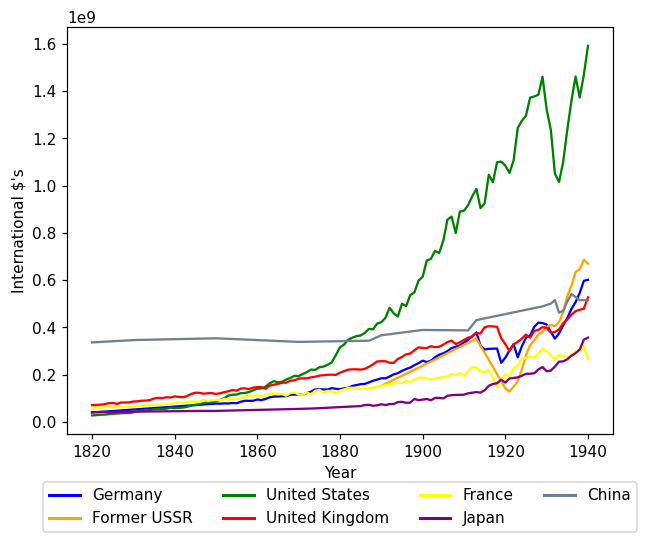

In [17]:
fig = plt.figure(dpi=110)
ax = fig.gca()
cntry = ['DEU', 'SUN', 'USA', 'GBR', 'FRA', 'JPN', 'CHN']
start_year, end_year = (1820,1940)
line_color = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'slategrey']
gdp[cntry].loc[start_year:end_year].interpolate().plot(
    ax = ax,
    ylabel = 'International $\'s',
    xlabel = 'Year',
    color = line_color
)

# Build Custom Legend
legend_elements = []
for i,c in enumerate(cntry):
    line = Line2D([0], [0], color=line_color[i], lw=2, label=code_to_name.loc[c]['country'])
    legend_elements.append(line)
ax.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=[0.5, -0.26])
plt.show()

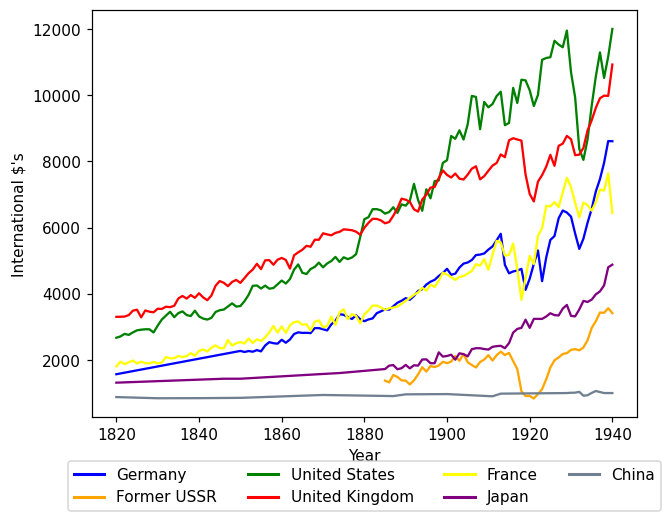

In [18]:
fig = plt.figure(dpi=110)
ax = fig.gca()
cntry = ['DEU', 'SUN', 'USA', 'GBR', 'FRA', 'JPN', 'CHN']
start_year, end_year = (1820,1940)
line_color = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'slategrey']
gdppc[cntry].loc[start_year:end_year].interpolate().plot(
    ax = ax,
    ylabel = 'International $\'s',
    xlabel = 'Year',
    color = line_color
)

# Build Custom Legend
legend_elements = []
for i,c in enumerate(cntry):
    line = Line2D([0], [0], color=line_color[i], lw=2, label=code_to_name.loc[c]['country'])
    legend_elements.append(line)
ax.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=[0.5, -0.25])
plt.show()

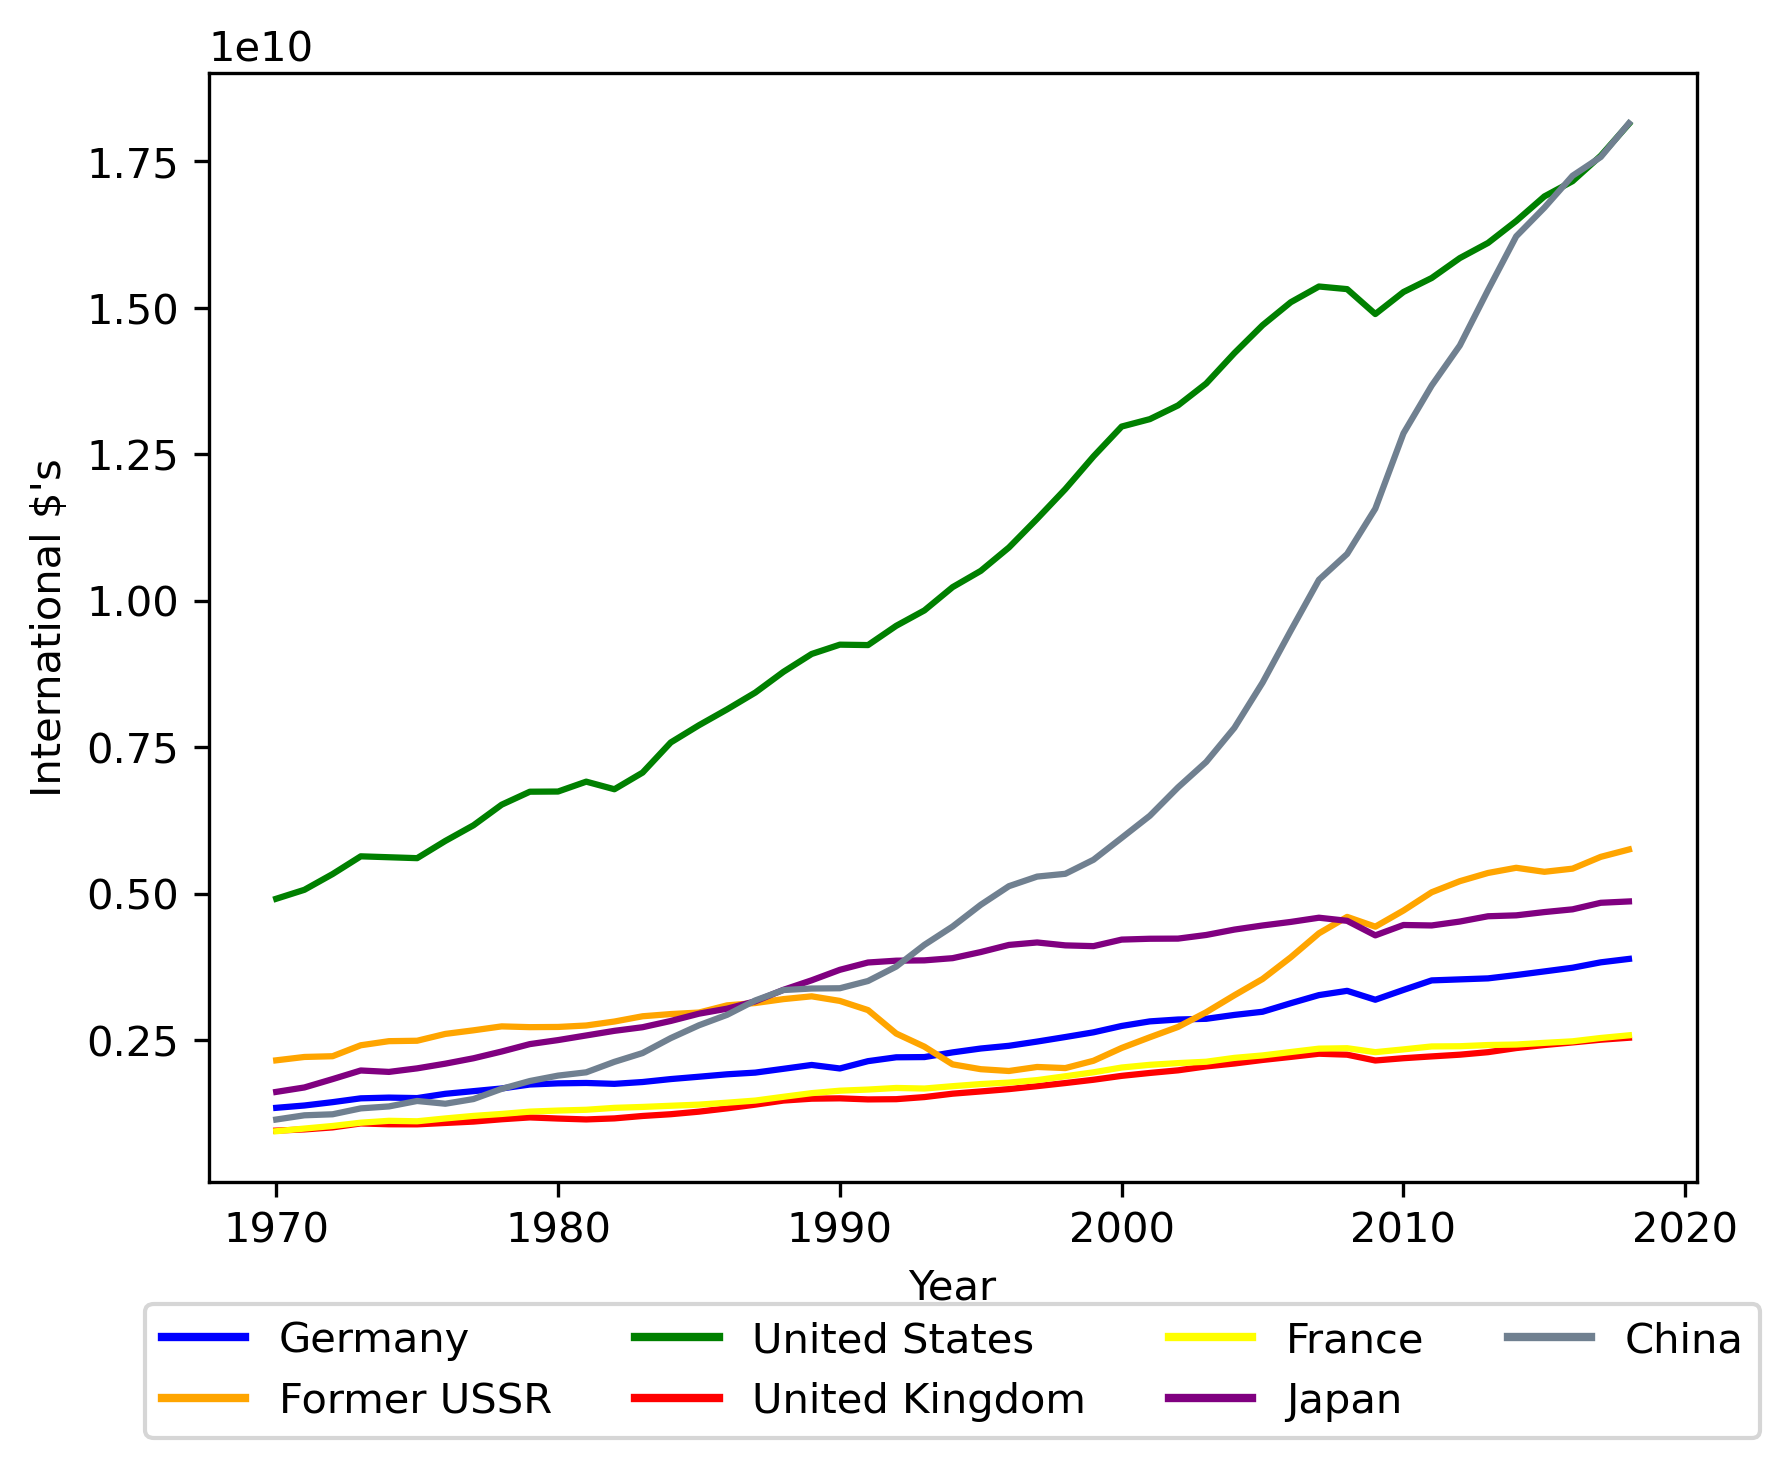

In [19]:
fig = plt.figure(dpi=300)
ax = fig.gca()
cntry = ['DEU', 'SUN', 'USA', 'GBR', 'FRA', 'JPN', 'CHN']
start_year, end_year = (1970, 2018)
line_color = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'slategrey']
gdp[cntry].loc[start_year:end_year].interpolate().plot(
    ax = ax,
    ylabel = 'International $\'s',
    xlabel = 'Year',
    color = line_color
)

# Build Custom Legend
legend_elements = []
for i,c in enumerate(cntry):
    line = Line2D([0], [0], color=line_color[i], lw=2, label=code_to_name.loc[c]['country'])
    legend_elements.append(line)
ax.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=[0.5, -0.25])
plt.show()

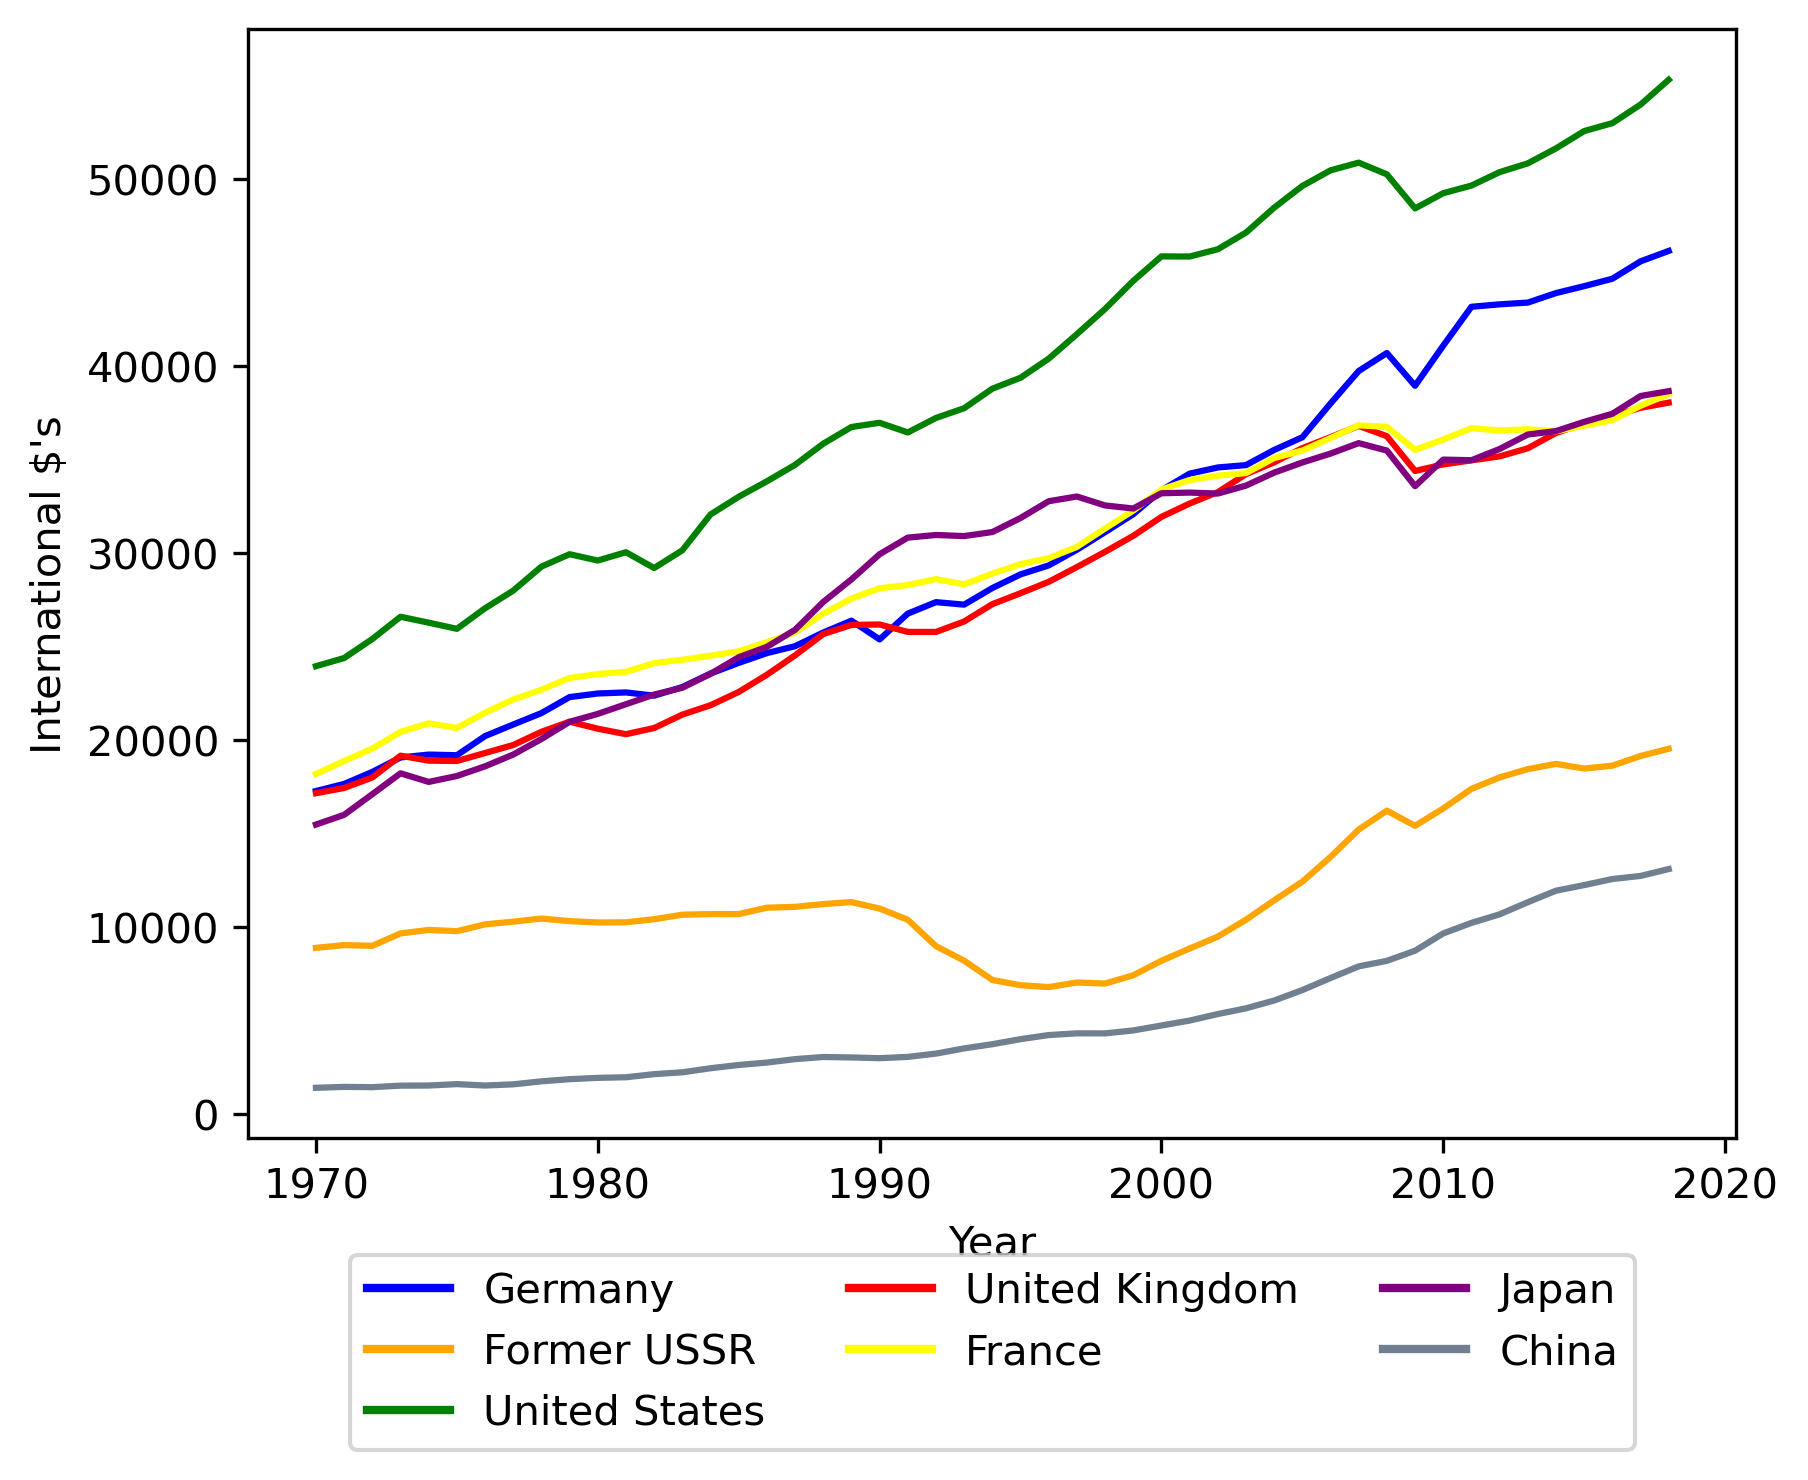

In [20]:
fig = plt.figure(dpi=300)
ax = fig.gca()
cntry = ['DEU', 'SUN', 'USA', 'GBR', 'FRA', 'JPN', 'CHN']
start_year, end_year = (1970, 2018)
line_color = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'slategrey']
gdppc[cntry].loc[start_year:end_year].interpolate().plot(
    ax = ax,
    ylabel = 'International $\'s',
    xlabel = 'Year',
    color = line_color
)

# Build Custom Legend
legend_elements = []
for i,c in enumerate(cntry):
    line = Line2D([0], [0], color=line_color[i], lw=2, label=code_to_name.loc[c]['country'])
    legend_elements.append(line)
ax.legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.3])
plt.show()

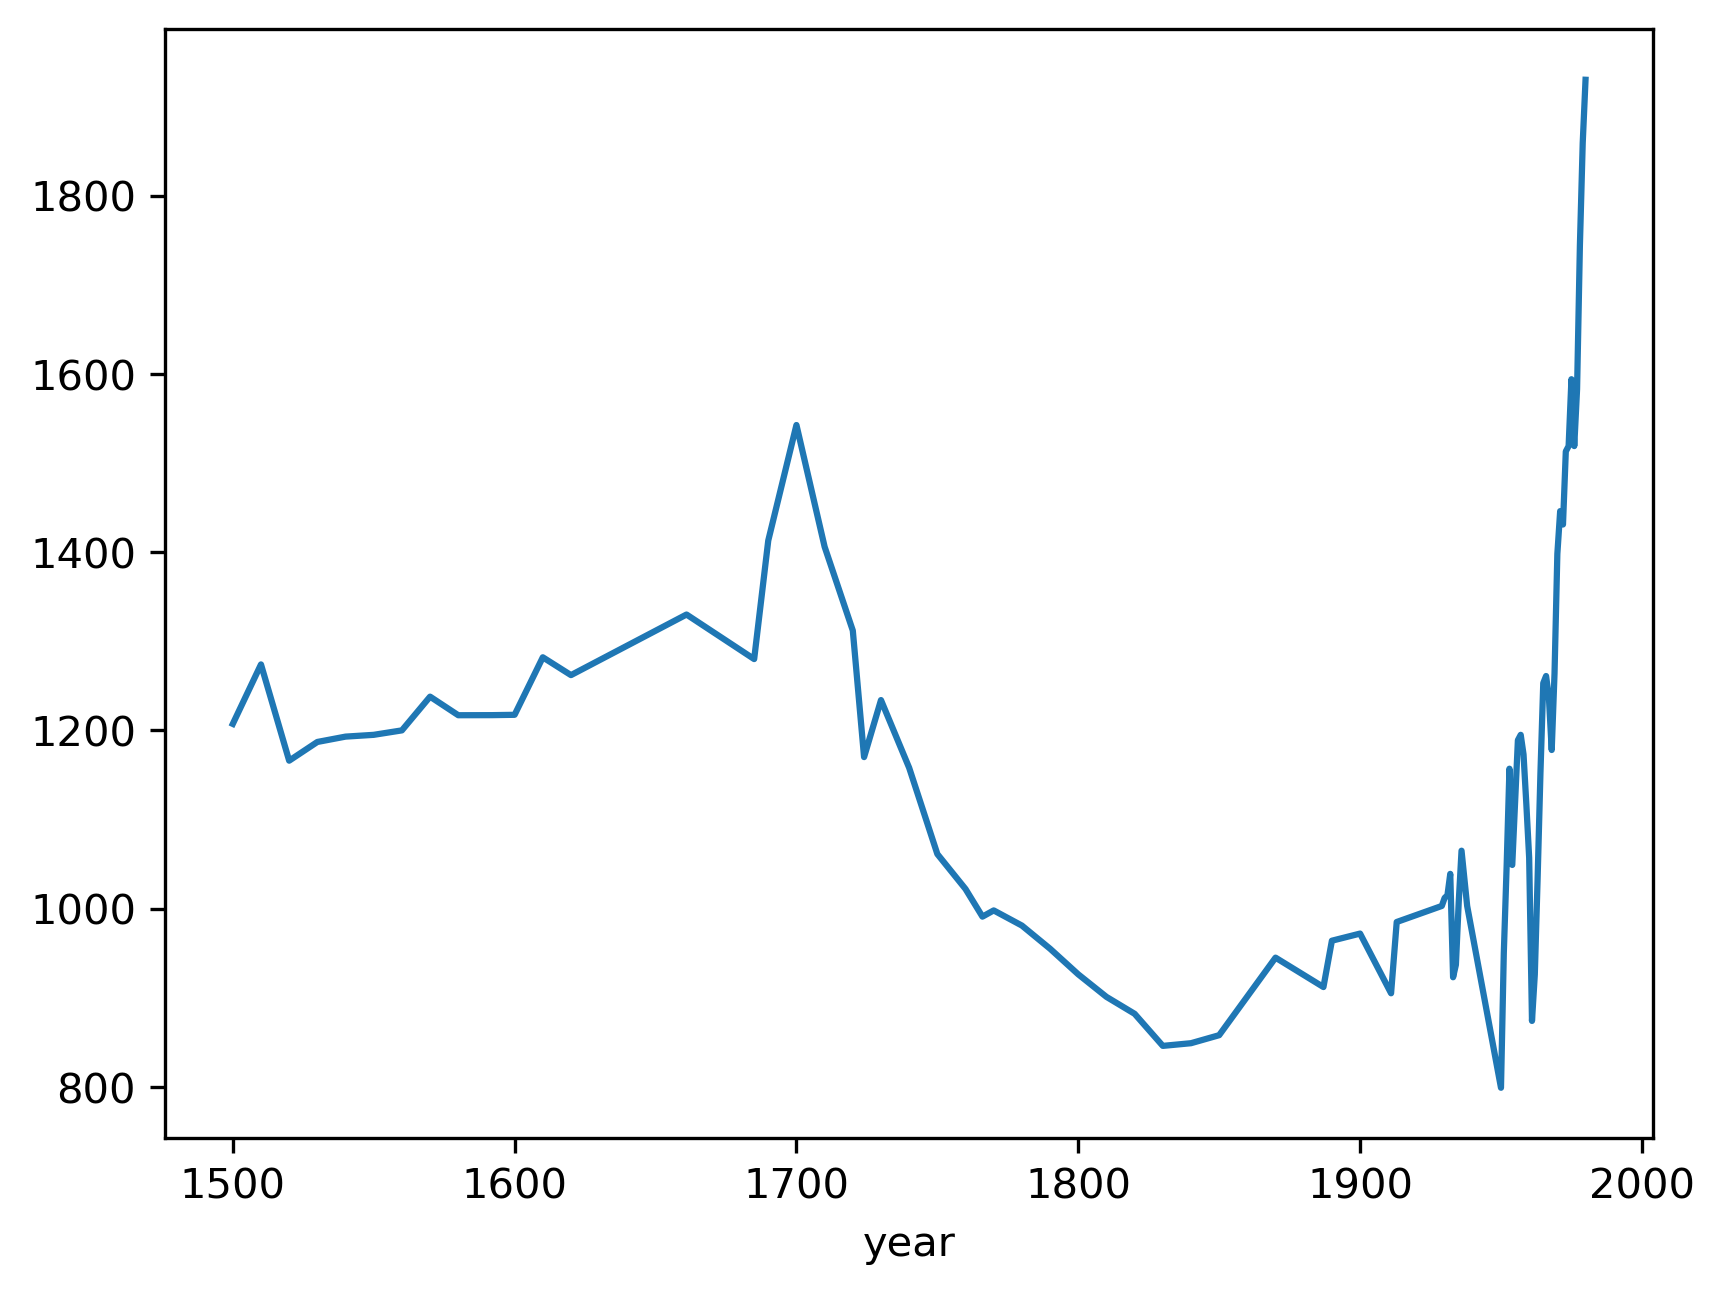

In [21]:
fig = plt.figure(dpi=300)
gdppc['CHN'].loc[1500:1980].interpolate().plot(ax=fig.gca())
plt.show()

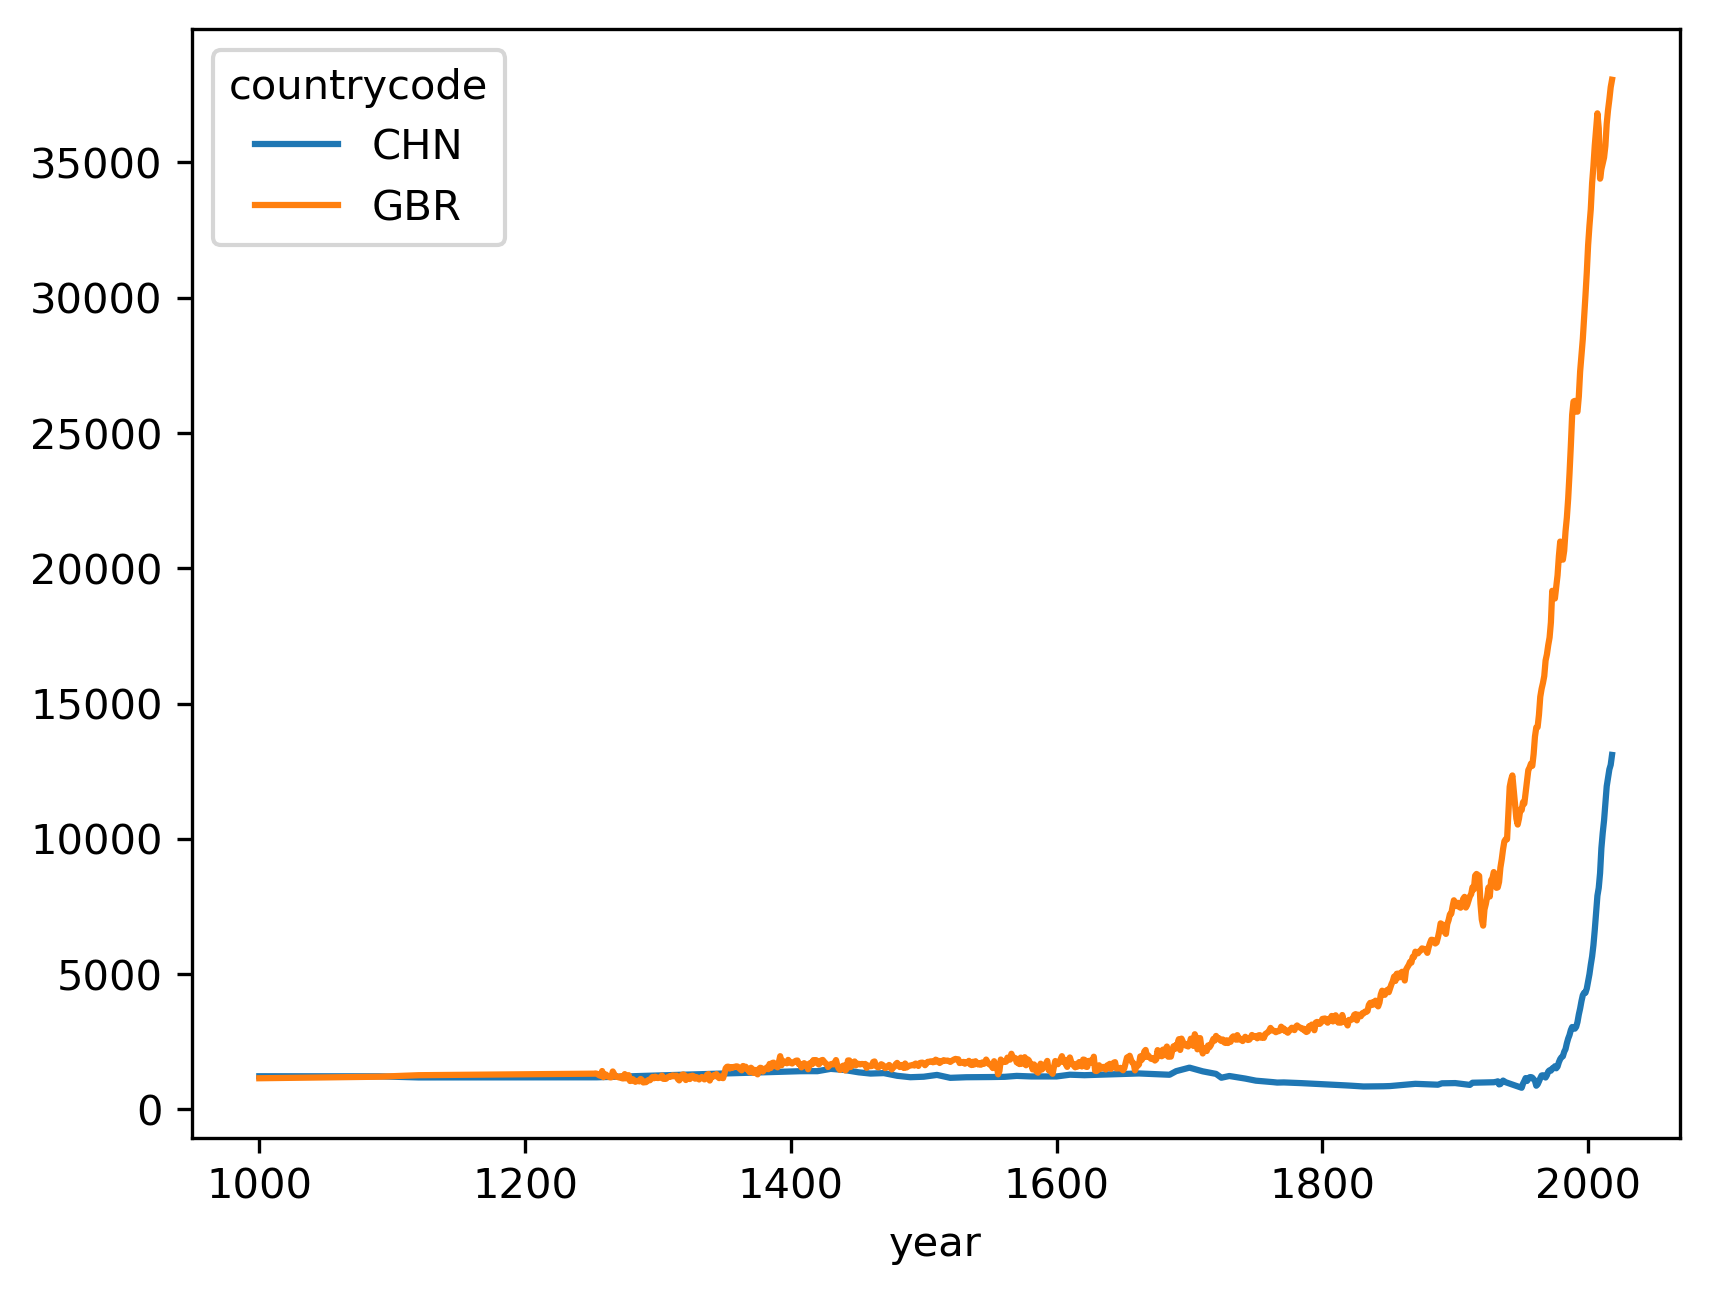

In [22]:
fig = plt.figure(dpi=300)
gdppc[['CHN', 'GBR']].interpolate().plot(ax = fig.gca())
plt.show()

In [23]:
data = pd.read_excel("datasets/mpd2020.xlsx", sheet_name='Regional data', header=(0,1,2), index_col=0)
data.columns = data.columns.droplevel(level=2)

In [24]:
regionalgdppc = data['gdppc_2011'].copy()
regionalgdppc.index = pd.to_datetime(regionalgdppc.index, format='%Y')

In [25]:
regionalgdppc.interpolate(method='time', inplace=True)

In [26]:
worldgdppc = regionalgdppc['World GDP pc']

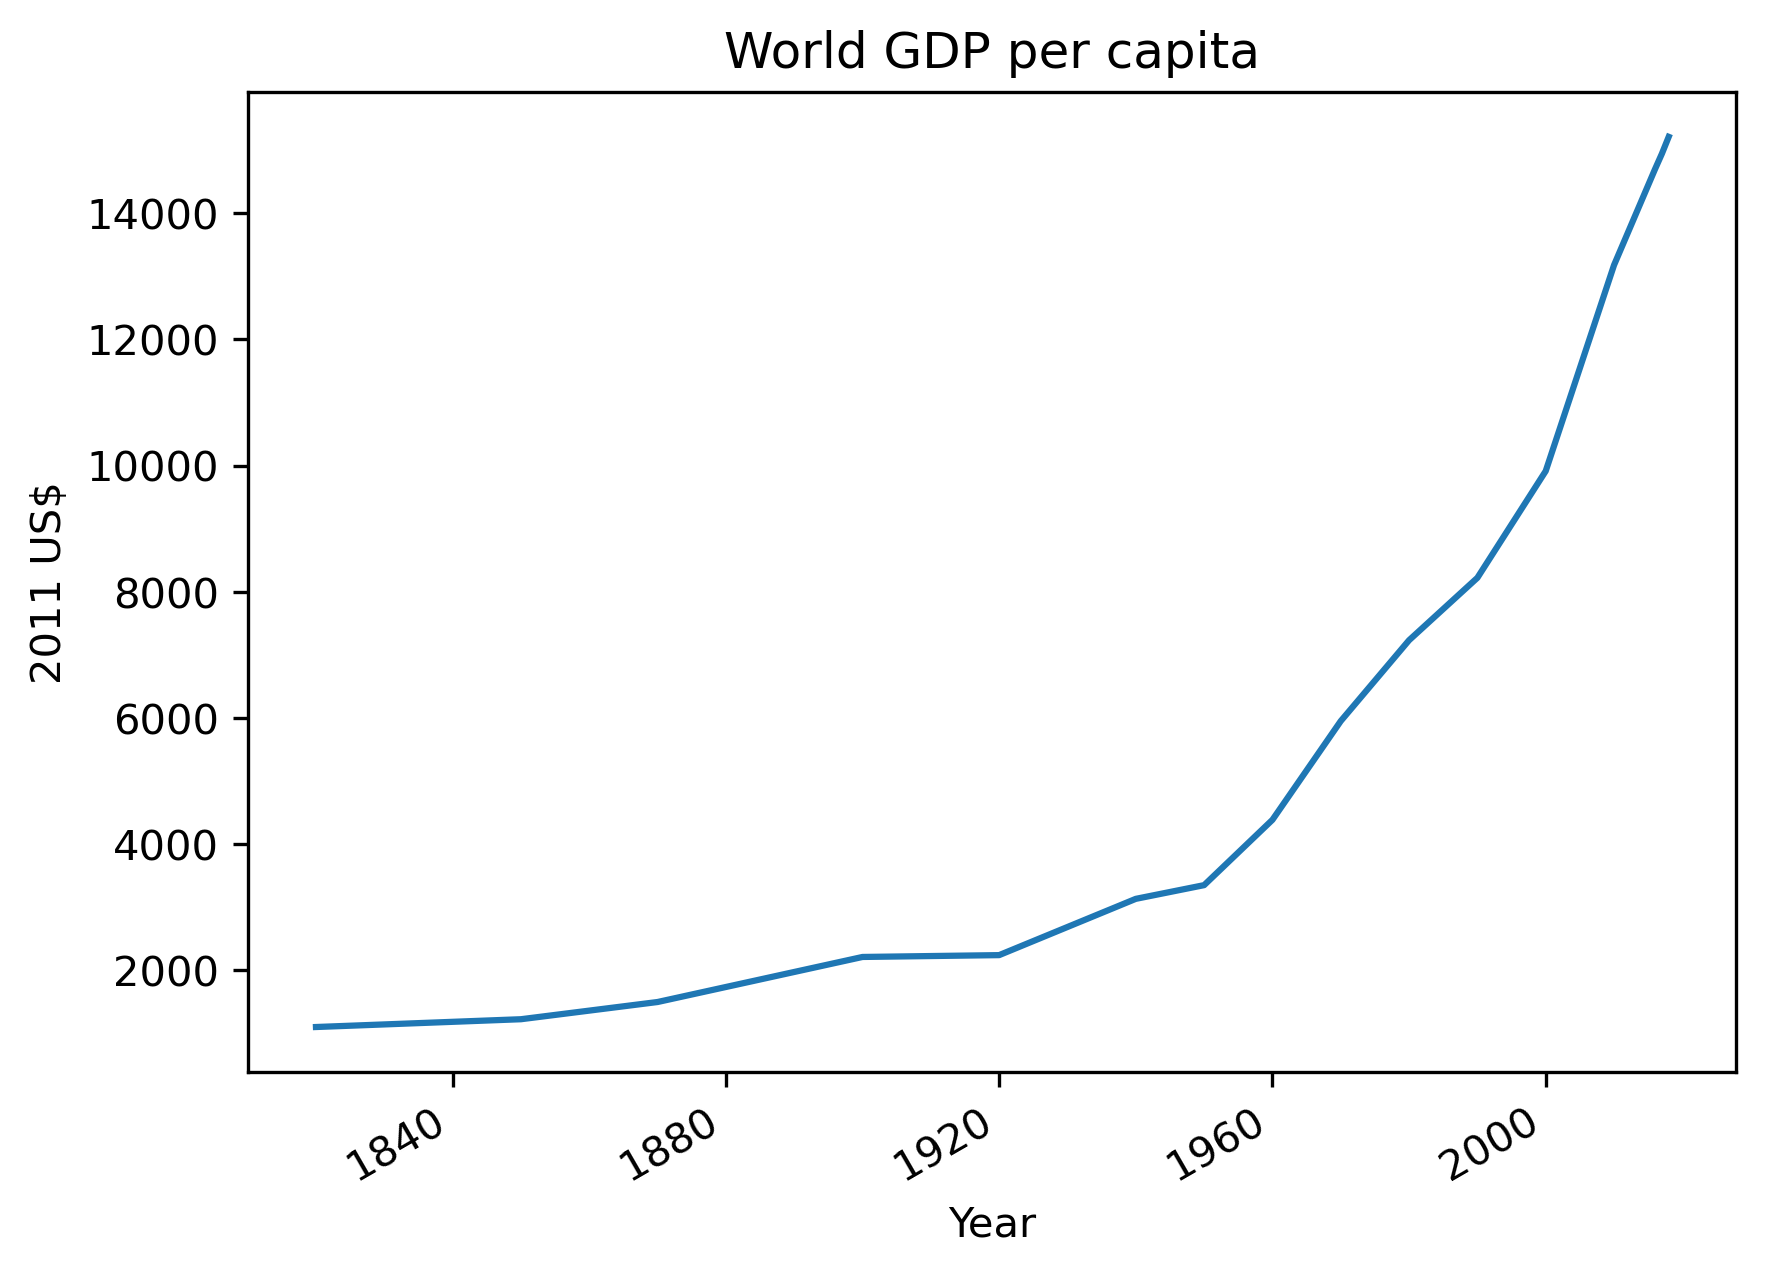

In [27]:
fig = plt.figure(dpi=300)
ax = fig.gca()
ax = worldgdppc.plot(
    ax = ax,
    title='World GDP per capita',
    xlabel='Year',
    ylabel='2011 US$',
)

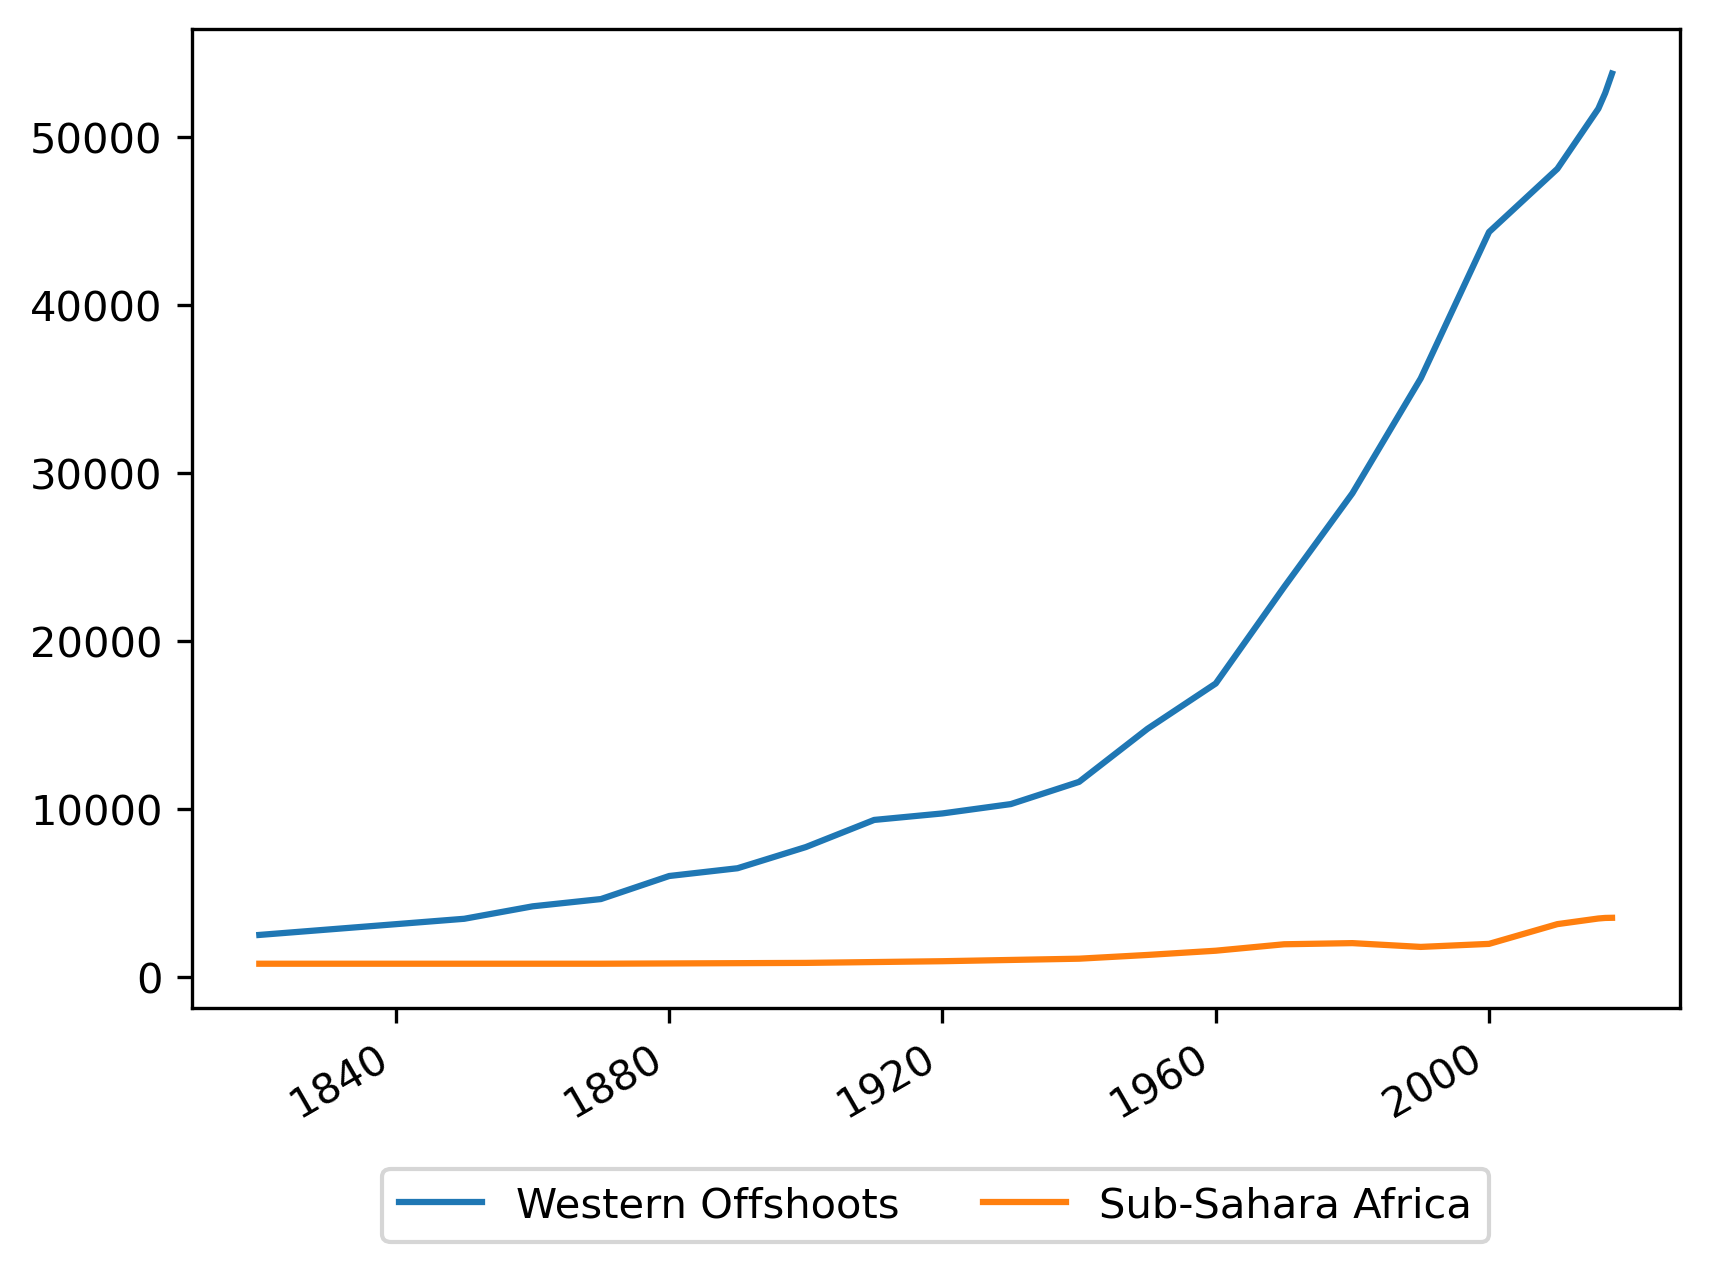

In [28]:
fig = plt.figure(dpi=300)
ax = fig.gca()
regionalgdppc[['Western Offshoots', 'Sub-Sahara Africa']].plot(ax = ax)
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=[0.5, -0.26])
plt.show()

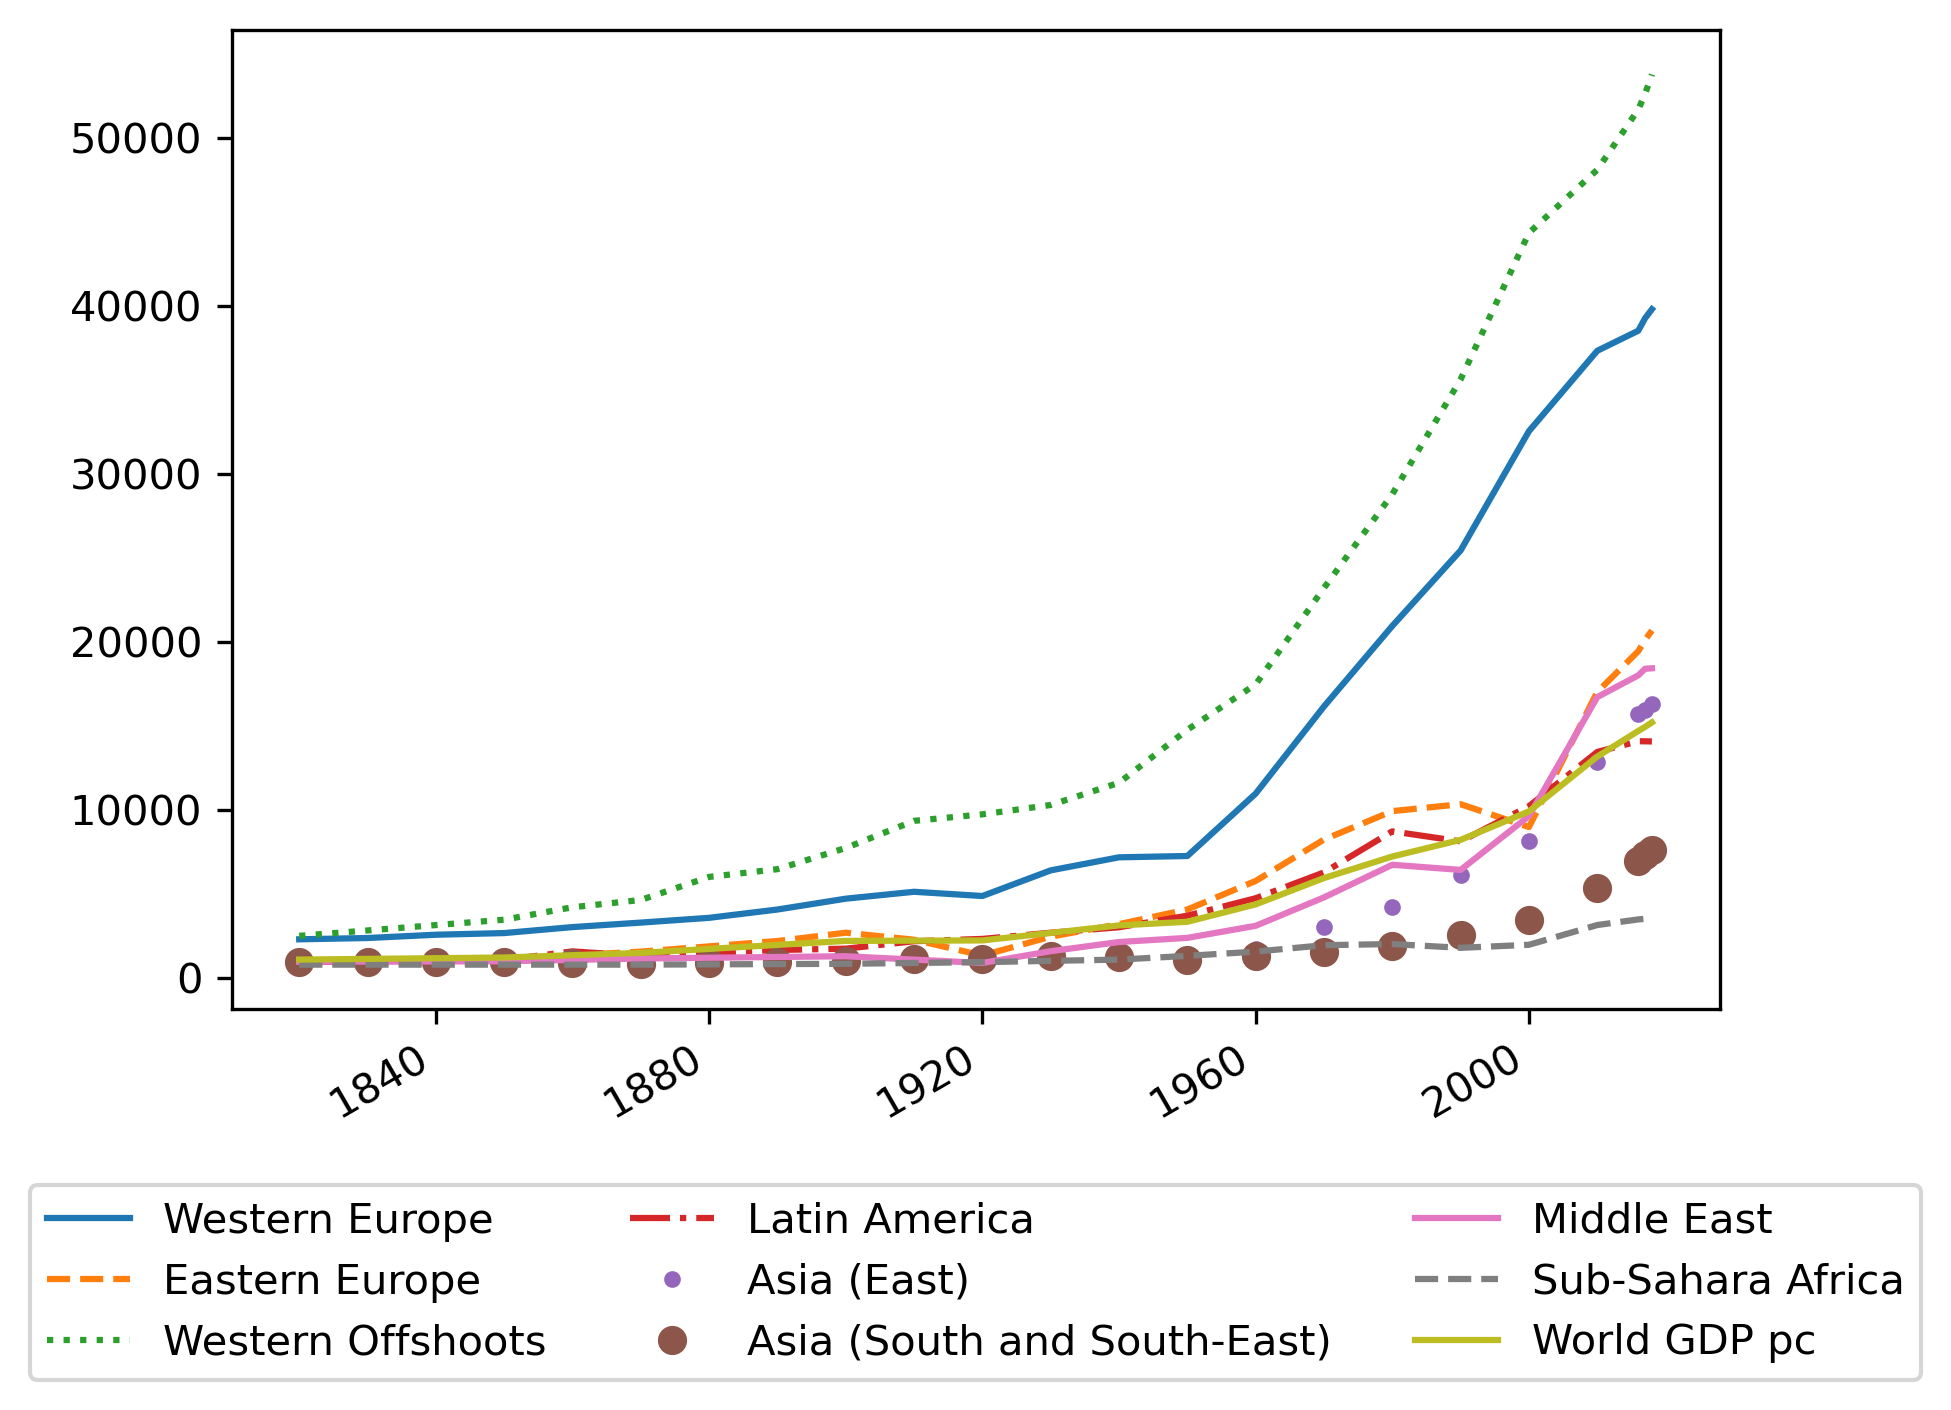

In [29]:
fig = plt.figure(dpi=300)
ax = fig.gca()
line_styles = ['-', '--', ':', '-.', '.', 'o', '-', '--', '-']
ax = regionalgdppc.plot(ax = ax, style=line_styles)
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.4])
plt.show()